In [35]:
import numpy as np
import matplotlib as plt
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

import graphviz

# Your work: what you have to do
Modify the given Jupyter notebook on decision trees on Iris data and perform the following tasks:

1. get an artificial inflation of some class in the training set by a given factor: 10 (weigh more the classes virginica or versicolor which are more difficult to discriminate). Learn the tree in these conditions.
2. modify the weight of some classes (set to 10 the weights for misclassification between virginica into versicolor or vice versa) and learn the tree in these conditions. You should obtain similar results as for step 1.
3. learn trees but try to avoid overfitting (by improving the error on the test set) tuning the hyper-parameters on: the minimum number of samples per leaf, max depth of the tree, min_impurity_decrease parameters, max leaf nodes, etc.
4. build the confusion matrix of the created tree models on the test set and show them. 
5. build the ROC curves (or coverage curves in coverage space) and plot them for each tree model you have created: for each model you have to build three curves, one for each class, considered in turn as the positive class.

# 1. Exercise

get an artificial inflation of some class in the training set by a given factor: 10 (weigh more the classes virginica or versicolor which are more difficult to discriminate). Learn the tree in these conditions.

In [18]:
iris = load_iris()

# Train Test Split
X_train, X_test_inf, y_train, y_test_inf = train_test_split(iris.data, 
                                                        iris.target, 
                                                        test_size=0.20, 
                                                        random_state=42)

# inflation
inflation = 10
keep = np.clip(y_train * inflation, a_min=1, a_max=inflation)
X_train_inflated = np.repeat(X_train, keep, axis=0)
y_train_inflated = np.repeat(y_train, keep, axis=0)

print(f"X_Train: {len(X_train_inflated)}, X_Test: {len(X_test_inf)},\
        y_Train: {len(y_train_inflated)}, y_Test: {len(y_test_inf)}")



# Fit Decision Tree Classifier
clf_inflated = DecisionTreeClassifier(criterion='entropy',
                                        random_state=300, 
                                        min_samples_leaf=5)
clf_inflated = clf_inflated.fit(X_train_inflated, y_train_inflated)

# Predict test set
y_test_predictions_inf = clf_inflated.predict(X_test_inf)

# Print results
print(f"Predictions:\n{y_test_predictions_inf} Lenght:{len(y_test_predictions_inf)}")
print(f"True Classes: \n{y_test_inf} Lenght: {len(y_test_inf)}")

truth_table = y_test_predictions_inf == y_test_inf

print(f"\n Are the Predictions and True classes the same? {(truth_table).all()}")
print(f"{truth_table} Length: {len(truth_table)}")
print(f"True: {sum(truth_table)} False: {len(y_test_inf)-sum(truth_table)}")


X_Train: 840, X_Test: 30,        y_Train: 840, y_Test: 30
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0] Lenght:30
True Classes: 
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0] Lenght: 30

 Are the Predictions and True classes the same? True
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True] Length: 30
True: 30 False: 0


#### Scoring and tree graph

In [19]:
# Accuracy score
acc_score = accuracy_score(y_test_inf, y_test_predictions_inf)
print(f"Accuracy score: {acc_score}")

# Macro F1 score
f1 = f1_score(y_test_inf, y_test_predictions_inf, average='macro')
print(f"F1 score: {f1}")

Accuracy score: 1.0
F1 score: 1.0


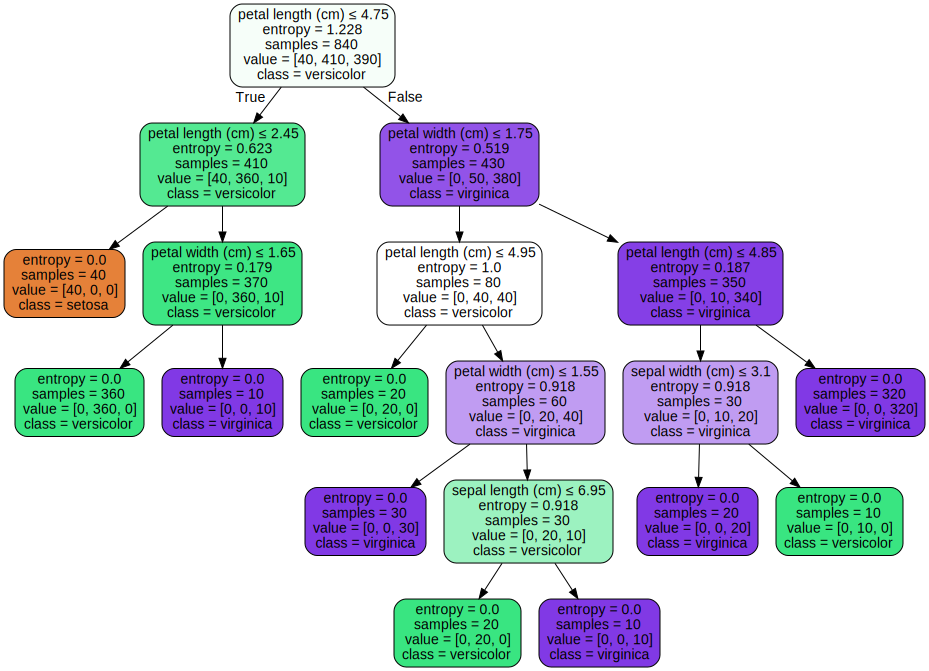

In [20]:
# Print tree graph

dot_data_w = tree.export_graphviz(clf_inflated, out_file=None, 
                                feature_names=iris.feature_names, 
                                class_names=iris.target_names,
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data_w)
graph

# 2. Exercise
modify the weight of some classes (set to 10 the weights for misclassification between virginica into versicolor or vice versa) and learn the tree in these conditions. You should obtain similar results as for step 1.

In [21]:
clf_weighted = DecisionTreeClassifier(criterion='entropy',
                                        random_state=300,
                                        min_samples_leaf=5,
                                        class_weight={0:1, 1:10, 2:10})

# Load Iris
X, y = load_iris(return_X_y=True)

# Train test split
X_train, X_test_w, y_train, y_test_w = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and Predict
clf_weighted = clf_weighted.fit(X_train, y_train)
y_test_predictions_w = clf_weighted.predict(X_test_w)

# Print results
print(f"Predictions:\n{y_test_predictions_w} Lenght:{len(y_test_predictions_w)}")
print(f"True Classes: \n{y_test_w} Lenght: {len(y_test_w)}")

truth_table = y_test_predictions_w == y_test_w

print(f"\n Are the Predictions and True classes the same? {(truth_table).all()}")
print(f"{truth_table} Length: {len(truth_table)}")
print(f"True: {sum(truth_table)} False: {len(y_test_w)-sum(truth_table)}")


Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0] Lenght:30
True Classes: 
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0] Lenght: 30

 Are the Predictions and True classes the same? True
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True] Length: 30
True: 30 False: 0


#### Scoring and tree graph

In [22]:
# Accuracy score
acc_score = accuracy_score(y_test_w, y_test_predictions_w)
print(f"Accuracy score: {acc_score}")

# Macro F1 score
f1 = f1_score(y_test_w, y_test_predictions_w, average='macro')
print(f"F1 score: {f1}")

Accuracy score: 1.0
F1 score: 1.0


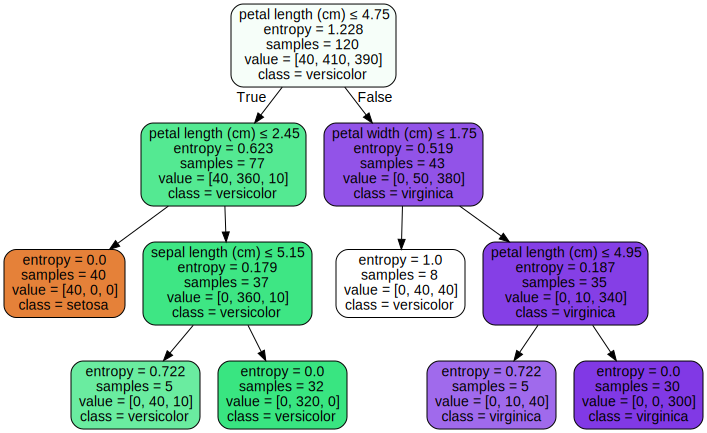

In [23]:
# Print tree graph

dot_data_w = tree.export_graphviz(clf_weighted, out_file=None, 
                                feature_names=iris.feature_names, 
                                class_names=iris.target_names,
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data_w)
graph

# 3. Exercise
learn trees but try to avoid overfitting (by improving the error on the test set) tuning the hyper-parameters on: the minimum number of samples per leaf, max depth of the tree, min_impurity_decrease parameters, max leaf nodes, etc.

In [28]:
clf_refined = DecisionTreeClassifier(criterion='entropy',
                                        random_state=300,
                                        min_samples_leaf=10,
                                        min_impurity_decrease=0.05,
                                        max_leaf_nodes=3,
                                        min_samples_split=20)

# Load Iris
X, y = load_iris(return_X_y=True)

# Train test split
X_train, X_test_r, y_train, y_test_r = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and Predict
clf_refined = clf_refined.fit(X_train, y_train)
y_test_predictions_r = clf_refined.predict(X_test_r)

# Print results
print(f"Predictions:\n{y_test_predictions_r} Lenght:{len(y_test_predictions_r)}")
print(f"True Classes: \n{y_test_r} Lenght: {len(y_test_r)}")

truth_table = y_test_predictions_r == y_test_r

print(f"\n Are the Predictions and True classes the same? {(truth_table).all()}")
print(f"{truth_table} Length: {len(truth_table)}")
print(f"True: {sum(truth_table)} False: {len(y_test_r)-sum(truth_table)}")


Predictions:
[1 0 2 1 2 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0] Lenght:30
True Classes: 
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0] Lenght: 30

 Are the Predictions and True classes the same? False
[ True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True] Length: 30
True: 29 False: 1


#### Scoring and tree graph

In [29]:
# Accuracy score
acc_score = accuracy_score(y_test_r, y_test_predictions_r)
print(f"Accuracy score: {acc_score}")

# Macro F1 score
f1 = f1_score(y_test_r, y_test_predictions_r, average='macro')
print(f"F1 score: {f1}")

Accuracy score: 0.9666666666666667
F1 score: 0.9658994032395567


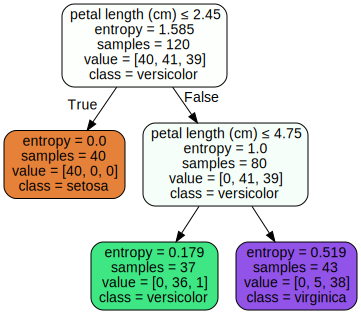

In [30]:
# Print tree graph

dot_data_w = tree.export_graphviz(clf_refined, out_file=None, 
                                feature_names=iris.feature_names, 
                                class_names=iris.target_names,
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data_w)
graph

# 4. Exercise
Build the confusion matrix of the created tree models on the test set and show them. 

In [27]:
# Confusion matrix of all models
inflated_cfm = confusion_matrix(y_true=y_test_inf, y_pred=y_test_predictions_inf)
weighted_cfm = confusion_matrix(y_true=y_test_w, y_pred=y_test_predictions_w)
refined_cfm = confusion_matrix(y_true=y_test_r, y_pred=y_test_predictions_r)

index = ["setosa(act)", "verticolor(act)", "virginica(act)"]
columns = ["setosa(pred)", "verticolor(pred)", "virginica(pred)"]

# Create cfm dataframes
df_inflated = pd.DataFrame(inflated_cfm, index, columns)
df_weighted = pd.DataFrame(weighted_cfm, index, columns)
df_refined = pd.DataFrame(refined_cfm, index, columns)

print("Confusion Matrix - Inflated")
display(df_inflated)
print("Confusion Matrix - Weighted")
display(df_weighted)
print("Confusion Matrix - Refined")
display(df_refined)

Confusion Matrix - Inflated


,setosa(pred),verticolor(pred),virginica(pred)
setosa(act),10,0,0
verticolor(act),0,9,0
virginica(act),0,0,11


Confusion Matrix - Weighted


,setosa(pred),verticolor(pred),virginica(pred)
setosa(act),10,0,0
verticolor(act),0,9,0
virginica(act),0,0,11


Confusion Matrix - Refined


,setosa(pred),verticolor(pred),virginica(pred)
setosa(act),13,0,0
verticolor(act),0,8,0
virginica(act),0,2,7


# 5. Exercise
build the ROC curves (or coverage curves in coverage space) and plot them for each tree model you have created: for each model you have to build three curves, one for each class, considered in turn as the positive class. 

In [40]:
X_plot = iris.data
y_plot = iris.target

y_plot = label_binarize(y_plot, classes=[0, 1, 2])
n_classes = y_plot.shape[1]

X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_plot,
                                                                    y_plot,
                                                                    test_size=0.2, 
                                                                    random_state=42)

subplot_kw = dict(
    xlabel=("False Positive Rate"),
    ylabel=("True Positive Rate"),
    xlim=([0.0, 1.0]),
    ylim=([0.0, 1.05])
)



In [57]:
# Binarize actuals 
def calculate_actuals_bin(class_index, y_test):
    return np.array([1 if x == class_index else 0 for x in y_test])

# Calculate scores of each class
def calculate_scores():
    return np.array([calculate_actuals_bin(i, y_test_r) for i in range(n_classes)])

# Compute FPR, TPR and AUC for each class
def compute_roc(classifier, weighted:bool):
    if weighted:
        y_train_binary = calculate_scores()
        y_score_bin = classifier.predict_proba(X_test_r)
    else:
        classifier = OneVsRestClassifier(classifier)
        y_score_bin = classifier.fit(X_train_bin, y_train_bin).predict_proba(X_test_bin)
    
    fpr, tpr, roc_auc = (dict() for _ in range(3))
    for i in range(n_classes):
        fpr[i], tpr[i], thresholds = roc_curve(y_test_bin[:, i], y_score_bin[:, i])
        roc_auc[i] = auc(fpr[i],tpr[i])
    return (fpr, tpr, roc_auc)

# Plot ROC Curves for each class
def plot_roc_curves(title: str, fpr, tpr, roc_auc):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=1,
                            ncols=3, 
                            sharex=True, 
                            figsize=(24, 6), 
                            subplot_kw=subplot_kw)

    ax0.set_title('setosa (act)')
    lw = 0
    ax0.plot(fpr[lw], tpr[lw], color='red', lw=lw, label=f'ROC curve (area = {roc_auc[lw]:.2f})')
    ax0.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    ax0.legend(loc='lower right')

    ax1.set_title('versicolor (act)')
    lw = 1
    ax1.plot(fpr[lw], tpr[lw], color='green', lw=lw, label=f'ROC curve (area = {roc_auc[lw]:.2f})')
    ax1.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    ax1.legend(loc='lower right')

    ax2.set_title('virginica (act)')
    lw = 2
    ax2.plot(fpr[lw], tpr[lw], color='purple', lw=lw, label=f'ROC curve (area = {roc_auc[lw]:.2f})')
    ax2.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    ax2.legend(loc='lower right')

    fig.suptitle(f'ROC curves for {title}')
    return fig


### Plotting roc curves

#### Inflated Case

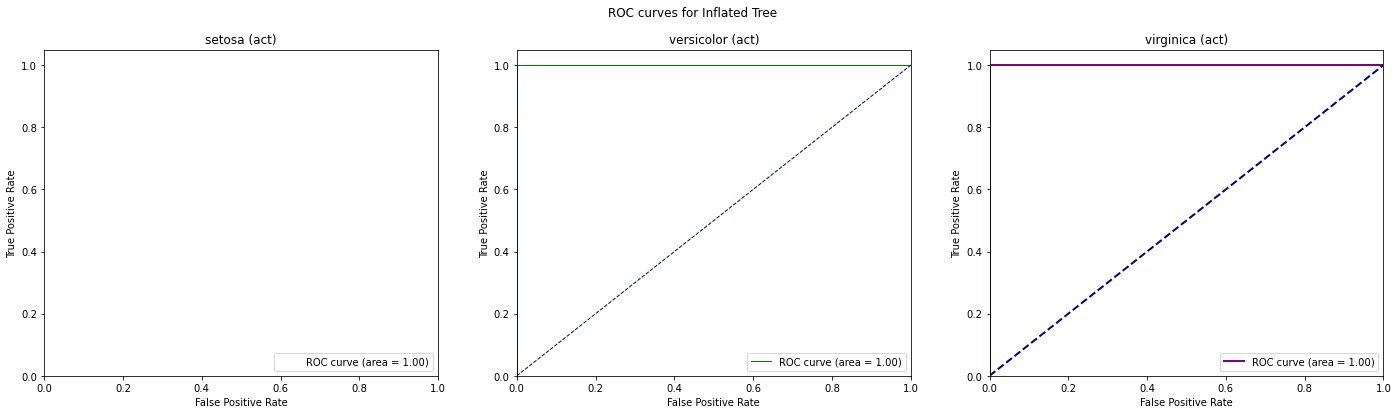

In [58]:
classifier: DecisionTreeClassifier = clf_inflated
title: str = "Inflated Tree"

fpr, tpr, roc_auc = compute_roc(classifier, False)
to_plot = plot_roc_curves(title, fpr, tpr, roc_auc)

#### Weighted Case

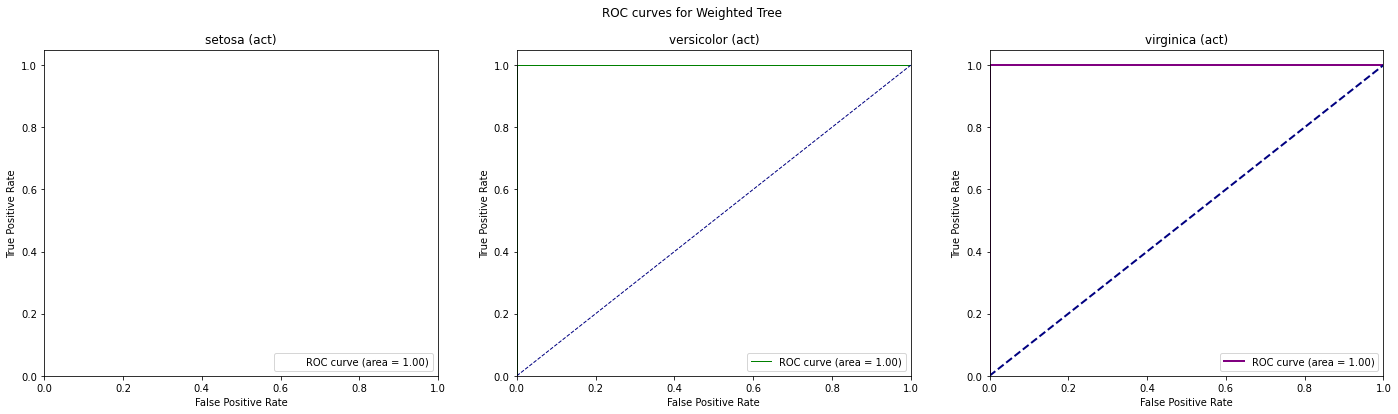

In [59]:
classifier: DecisionTreeClassifier = clf_weighted
title: str = "Weighted Tree"

fpr, tpr, roc_auc = compute_roc(classifier, True)
to_plot = plot_roc_curves(title, fpr, tpr, roc_auc)

#### Refined Case

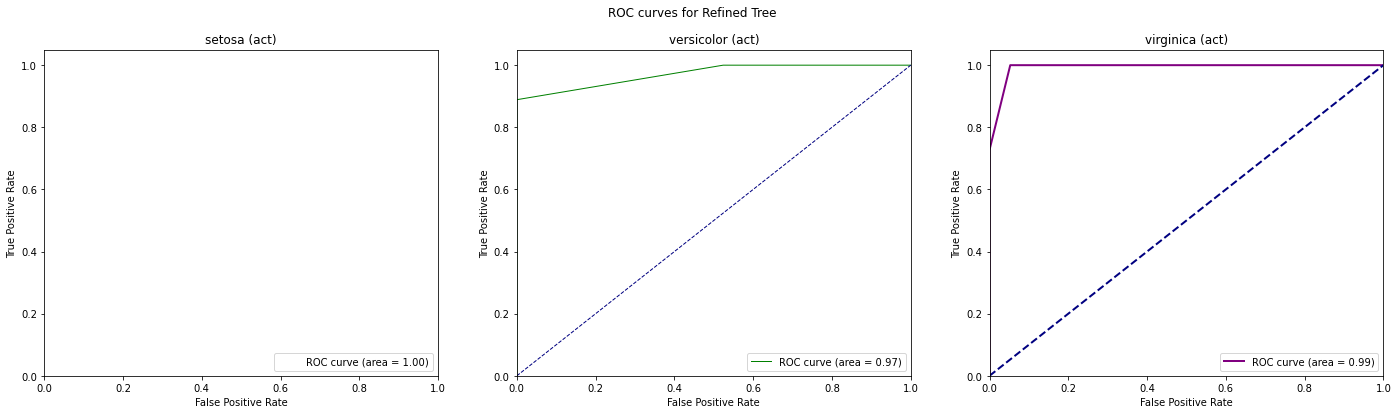

In [60]:
classifier: DecisionTreeClassifier = clf_refined
title: str = "Refined Tree"

fpr, tpr, roc_auc = compute_roc(classifier, False)
to_plot = plot_roc_curves(title, fpr, tpr, roc_auc)